Przygotowanie środowiska

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
plt.rc('figure', figsize=(10, 10))
plt.rcParams.update({'font.size': 22})

Wczytanie danych, wybór kolumn przy ładowaniu

In [54]:
fields = ['P_ROKDYP',"P_N","P_POZIOM", # wartosci filtrujace
"P_E_ZAR_STUD_P5","P_E_ZAR_NSTUD_P5","P_E_ZAR_P5", #potencjalne dane o zarobkach absolwentow po 5 latach
"P_E_ZAR_DOSW_P5","P_E_ZAR_NDOSW_P5",
"P_ME_ZAR_P5","P_ME_ZAR_DOSW_P5","P_ME_ZAR_NDOSW_P5",
"P_ME_ZAR_STUD_P5","P_ME_ZAR_NSTUD_P5",
"P_E_ZAR_ETAT_P5","P_E_ZAR_ETAT_DOSW_P5","P_E_ZAR_ETAT_NDOSW_P5",
"P_E_ZAR_ETAT_STUD_P5","P_E_ZAR_ETAT_NSTUD_P5",
"P_ME_ZAR_ETAT_P5","P_ME_ZAR_ETAT_DOSW_P5","P_ME_ZAR_ETAT_NDOSW_P5",
"P_ME_ZAR_ETAT_STUD_P5","P_ME_ZAR_ETAT_NSTUD_P5",
'P_NAZWA_UCZELNI',"P_NAZWA_KIERUNKU_PELNA" #dane o uczelni i kierunku
,"P_KIERUNEK_ID","P_FORMA","P_DZIEDZINA","P_WOJ"] 
data1 = pd.read_csv('dane/graduates-major-data.csv',sep=";",usecols=fields,decimal=',')

In [55]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41792 entries, 0 to 41791
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   P_ROKDYP                41792 non-null  int64  
 1   P_KIERUNEK_ID           41792 non-null  int64  
 2   P_POZIOM                41792 non-null  object 
 3   P_FORMA                 41792 non-null  object 
 4   P_N                     41792 non-null  int64  
 5   P_E_ZAR_STUD_P5         2736 non-null   float64
 6   P_E_ZAR_NSTUD_P5        7194 non-null   float64
 7   P_E_ZAR_P5              14190 non-null  float64
 8   P_E_ZAR_DOSW_P5         9247 non-null   float64
 9   P_E_ZAR_NDOSW_P5        10511 non-null  float64
 10  P_ME_ZAR_STUD_P5        2736 non-null   float64
 11  P_ME_ZAR_NSTUD_P5       7194 non-null   float64
 12  P_ME_ZAR_P5             14190 non-null  float64
 13  P_ME_ZAR_DOSW_P5        9247 non-null   float64
 14  P_ME_ZAR_NDOSW_P5       10511 non-null

Pierwsza filtracja danych

In [56]:
# dane o absolwentach z roku 2014 i 2015 roku 
data1 = data1[(data1['P_ROKDYP']==2014) | (data1['P_ROKDYP']==2015)]
# studia magisterskie lub jednolitemagisterskie
data1 = data1[(data1['P_POZIOM']=="JM") | (data1['P_POZIOM']=="2")]

Puste wartości

In [57]:
# znaczna czesc kolumn posiada tylko polowe informacji
# najwiecje ogolnych informacji uzyskamy o sredniej/medianie zarobkow
nullvalues = data1.isna().sum()
nullvalues[nullvalues > 0]

P_E_ZAR_STUD_P5           5013
P_E_ZAR_NSTUD_P5          3032
P_E_ZAR_P5                  16
P_E_ZAR_DOSW_P5           1541
P_E_ZAR_NDOSW_P5          1313
P_ME_ZAR_STUD_P5          5013
P_ME_ZAR_NSTUD_P5         3032
P_ME_ZAR_P5                 16
P_ME_ZAR_DOSW_P5          1541
P_ME_ZAR_NDOSW_P5         1313
P_E_ZAR_ETAT_STUD_P5      5097
P_E_ZAR_ETAT_NSTUD_P5     3037
P_E_ZAR_ETAT_P5             22
P_E_ZAR_ETAT_DOSW_P5      1677
P_E_ZAR_ETAT_NDOSW_P5     1492
P_ME_ZAR_ETAT_STUD_P5     5097
P_ME_ZAR_ETAT_NSTUD_P5    3037
P_ME_ZAR_ETAT_P5            22
P_ME_ZAR_ETAT_DOSW_P5     1677
P_ME_ZAR_ETAT_NDOSW_P5    1492
P_DZIEDZINA                 21
dtype: int64

Druga filtracja danych + zamiana cyfrowych wojewodztw na tekst

In [58]:
# zgrupowanie po kierunku na uczelni z podzialem na stacjonarne i niestacjonarne,
# liczba osob na kierunku zsumowana z lat 2014 i 2015, 
# zarobki na konkretnym kierunku uśredniona
data1 = data1.groupby(["P_NAZWA_UCZELNI","P_KIERUNEK_ID","P_NAZWA_KIERUNKU_PELNA","P_FORMA","P_DZIEDZINA","P_WOJ"]).agg({
    "P_N" :'sum',"P_E_ZAR_P5":'mean',"P_ME_ZAR_P5":'mean',
}).reset_index()

# wybranie kierunkow posiadajacych conajmniej 30 absolwentow
data1 = data1[(data1['P_N']>=30)]

# przypisanie wartosciom numerycznym wojewodztw wartosci tekstowe
wojewodztwa = {
    14:"Mazowieckie", 12:"Małopolskie", 24:"Śląskie",30:"Wielkopolskie",
    2:"Dolnoślaśkie",22:"Pomorskie",6:"Lubelskie",10:"Łódzkie",
    4:"Kujawsko-Pomorskie",32:"Zachodniopomorskie",18:"Podkarpackie",
    20:"Podlaskie",28:"Warmińsko-mazurskie",16:"Opolskie",
    26:"Świętokrzyskie", 8:"Lubuskie"
}
data1['P_WOJ']=data1['P_WOJ'].map(wojewodztwa)

# łącznie absolwentow
data1["P_N"].sum()

314667

Udział absolwentow stac i niestac w danych

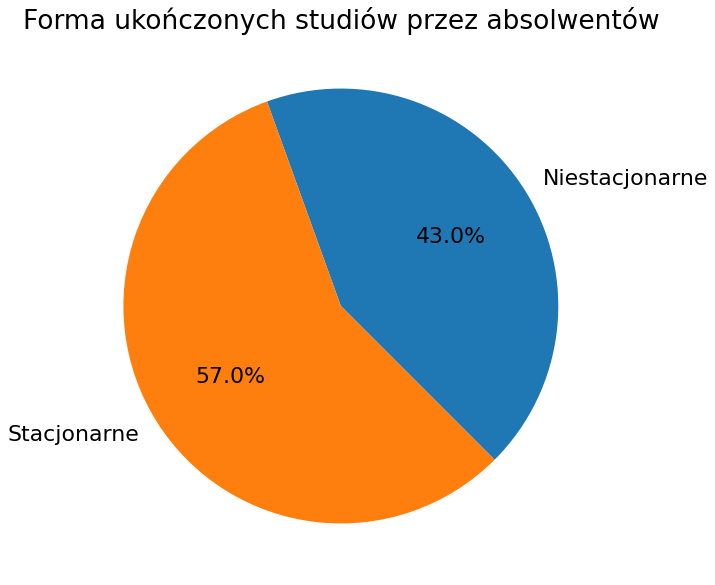

In [59]:
# Suma absolwentow na studiach stacjonarnych i niestacjonarnych
formadata = data1.groupby(['P_FORMA']).agg({"P_N":"sum"})
formadata=formadata.reset_index()

plt.pie(formadata['P_N'],labels=["Niestacjonarne",'Stacjonarne'],autopct='%1.1f%%',startangle=-45)
plt.title("Forma ukończonych studiów przez absolwentów")
plt.savefig('plots/Udzial1.png', dpi=400, bbox_inches='tight')
plt.show()

Dziedziny studiów w badaniu

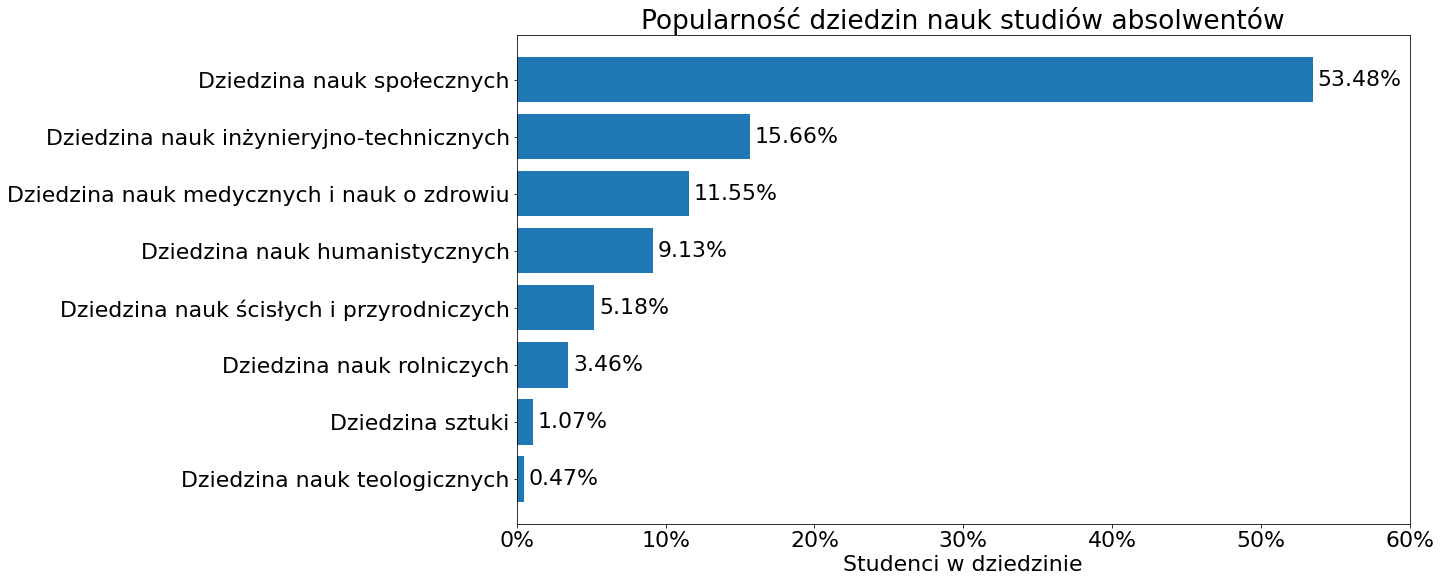

In [60]:
# zgrupowanie wedlug dziedziny i zliczenie kierunkow w tej dziedzinie
dziedzinadata = data1.groupby(["P_DZIEDZINA"])['P_N'].sum().sort_values(ascending=True)
dziedzinadata = dziedzinadata.reset_index()
dziedzinadata["P_N"] = dziedzinadata["P_N"] / dziedzinadata["P_N"].sum()

plt.figure(figsize=(16,9))
bars = plt.barh(y=dziedzinadata['P_DZIEDZINA'],width=dziedzinadata["P_N"])
plt.title("Popularność dziedzin nauk studiów absolwentów")
plt.bar_label(bars,labels=[f'{x:.2%}' for x in bars.datavalues],padding=5)
plt.xlabel("Studenci w dziedzinie")
plt.xticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1],labels=["0%","10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"])
plt.xlim(right=.60)
plt.grid(False)
plt.savefig('plots/PopularnoscDziedzina.png', dpi=400, bbox_inches='tight')
plt.show()

Forma studiów a dziedzina nauk

In [61]:
# zgrupowanie wedlug dziedziny i zliczenie kierunkow w tej dziedzinie
dziedzinadataForm = data1.groupby(["P_DZIEDZINA",'P_FORMA'])['P_N'].sum()
dziedzinadataForm = dziedzinadataForm.reset_index()
dziedzinadataForm["P_N"] = dziedzinadataForm["P_N"] / dziedzinadataForm["P_N"].sum()

# wyodrebnienie danych z forma studiowania, posortowanie 
# tak by zachować kolejność z ogolnej popularnosci
dataFN = dziedzinadataForm[dziedzinadataForm['P_FORMA']=="N"]
dataFS = dziedzinadataForm[dziedzinadataForm['P_FORMA']=="S"]
dataFN = dataFN.set_index("P_DZIEDZINA")
dataFN = dataFN.reindex(index=dziedzinadata["P_DZIEDZINA"])
dataFN = dataFN.reset_index()
dataFS = dataFS.set_index("P_DZIEDZINA")
dataFS = dataFS.reindex(index=dziedzinadata["P_DZIEDZINA"])
dataFS = dataFS.reset_index()


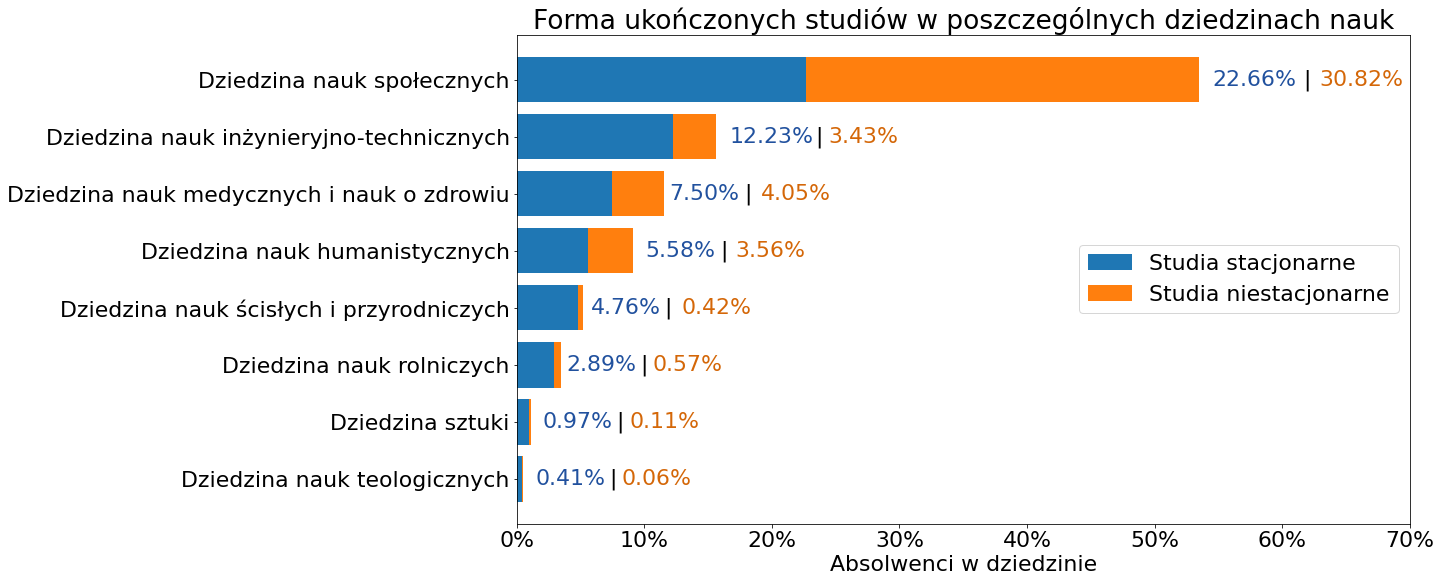

In [62]:
# stacked bars plot
plt.figure(figsize=(16,9))
bars1 = plt.barh(y=dataFS['P_DZIEDZINA'],width=dataFS["P_N"])
bars2 = plt.barh(y=dataFN['P_DZIEDZINA'],width=dataFN["P_N"],left=dataFS["P_N"])
plt.legend(['Studia stacjonarne',"Studia niestacjonarne"],loc="right")

plt.title("Forma ukończonych studiów w poszczególnych dziedzinach nauk")

# rysowanie po plocie w zewnetrznej funkcji
# rysuje wartosci % przy barach
from barPlotSpecialLabel import barPlotSpecialLabel
barPlotSpecialLabel(bars1,bars2)

plt.xlabel(f'Absolwenci w dziedzinie')
plt.xticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1],labels=["0%","10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"])
plt.xlim(right=.70)
plt.grid(False)
plt.savefig('plots/PopularnoscDziedzinaForma.png', dpi=400, bbox_inches='tight')
plt.show()

In [63]:
# Przy analizie zarobków z reguły wartości median pozwalają lepiej ocenić zarobki
# w konkretnej firmie. Pozwala to na pominęcie potencjalnie zawyżonej sredniej 
# zarobków przez najwyższe stanowiska.
# Analizowane wartości średnich i median zarobków są dosyć podobne 
# lecz jak wyżej ująłem wartości median mogą bliżej odpowiadać rzeczywistości.
data1.iloc[:,7:10].describe()

,P_E_ZAR_P5,P_ME_ZAR_P5
count,2459.000000,2459.000000
mean,4832.972814,4556.409587
std,1750.453118,1700.022124
min,1902.385000,1015.985000
25%,3653.477500,3454.045000
50%,4338.935000,4082.415000
75%,5487.917500,5146.875000
max,14338.935000,15177.510000


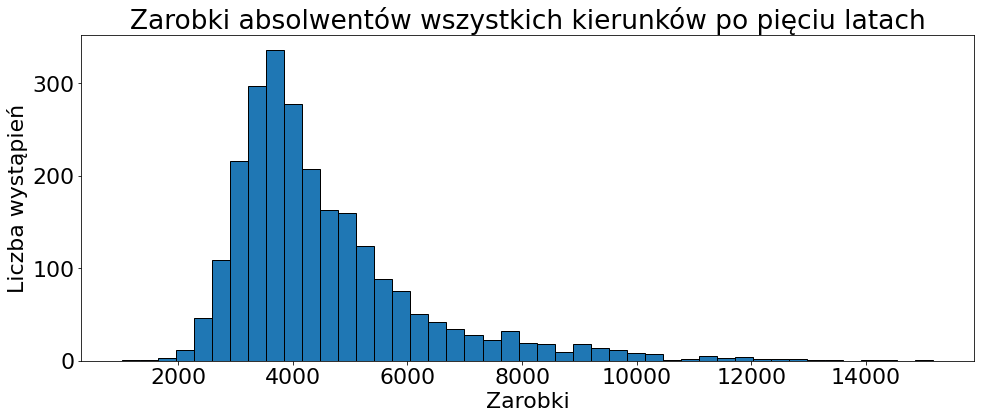

In [64]:
# Jak się rozkładają zarobki wszsytkich absolwentów
def wageDisrtributionPlot(target,plotTitle,savename):
    plt.figure(figsize=(16,6))
    plt.hist(x=target,bins=45,edgecolor="black")
    plt.title(plotTitle)
    plt.xlabel("Zarobki")
    plt.ylabel("Liczba wystąpień")
    plt.grid(False)
    plt.savefig(f'plots/{savename}.png', dpi=400, bbox_inches='tight')
    plt.show()

# wageDisrtributionPlot(data1['P_E_ZAR_P5'],"Rozkład średnich zarobków absolwentów roku 2014 i 2015","RozkładZarobkowSr")
wageDisrtributionPlot(data1['P_ME_ZAR_P5'],"Zarobki absolwentów wszystkich kierunków po pięciu latach","RozkładZarobkowMed")

Średnie zarobki w poszczególnych dziedzinach

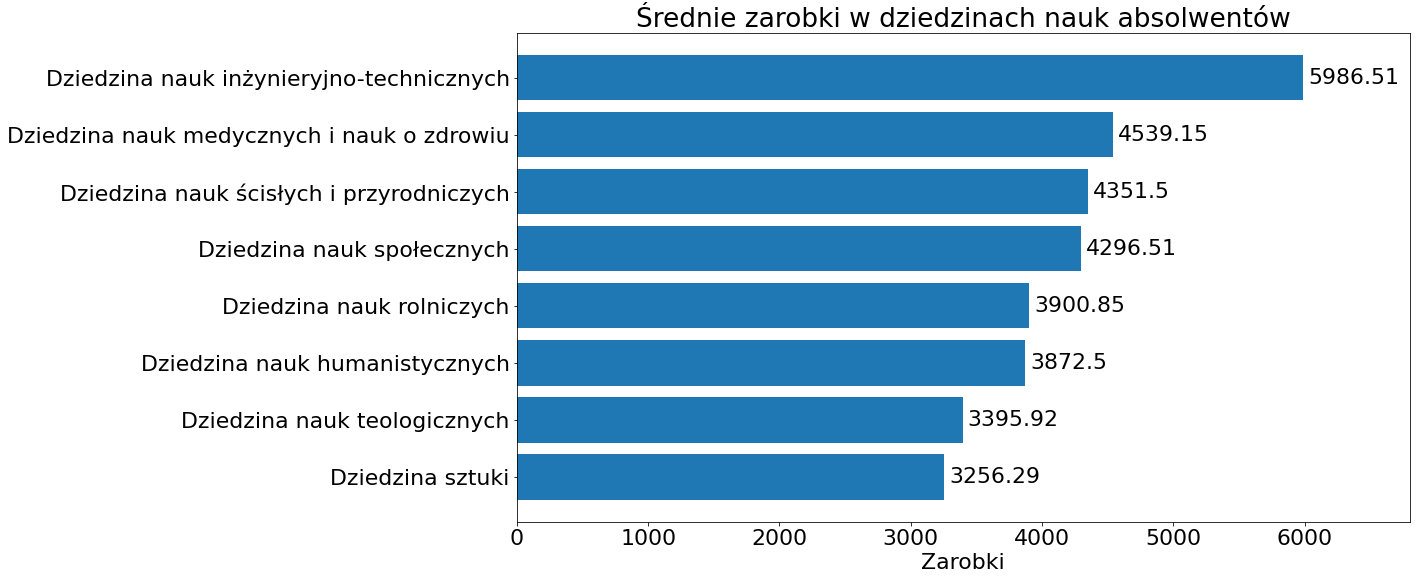

In [65]:
# zgrupowanie po
zardziedatasr = data1.groupby("P_DZIEDZINA").agg({"P_ME_ZAR_P5":'mean'}).sort_values(by="P_ME_ZAR_P5",ascending=True)
zardziedatasr = zardziedatasr.reset_index()

def fieldPopularityPlot(targety,targetw,plotTitle,savename,xlimR):
    plt.figure(figsize=(16,9))
    bars = plt.barh(y=targety,width=targetw)
    plt.title(plotTitle)
    plt.bar_label(bars,padding=5)
    plt.xlim(right=xlimR)
    plt.grid(False)
    plt.xlabel("Zarobki")
    plt.savefig(f'plots/{savename}.png', dpi=400, bbox_inches='tight')
    plt.show()

fieldPopularityPlot(zardziedatasr['P_DZIEDZINA'],zardziedatasr["P_ME_ZAR_P5"],
        "Średnie zarobki w dziedzinach nauk absolwentów",
        "ZarobkiWdziedzinach",6800)

Najlepiej płatne kierunki w wojewodztwach

In [72]:
bestinWoj = data1.groupby(["P_WOJ"])["P_ME_ZAR_P5"].transform(max)==data1['P_ME_ZAR_P5']
bestinWoj = data1[bestinWoj].sort_values("P_ME_ZAR_P5",ascending=False).reset_index()
bestinWoj.index+=1
bestinWoj=bestinWoj.iloc[:,[6,1,3,9]].rename(columns={
    "P_WOJ":"Wojewodztwo",
    "P_NAZWA_UCZELNI":'Nazwa uczelni',
    "P_NAZWA_KIERUNKU_PELNA":"Nazwa kierunku",
    "P_ME_ZAR_P5":"Mediana zarobków"})
bestinWoj.to_excel("spreadsheets/bestinWoj.xlsx")
bestinWoj.head() #dla podgladu

,Wojewodztwo,Nazwa uczelni,Nazwa kierunku,Mediana zarobków
1,Małopolskie,Akademia Górniczo-Hutnicza im. Stanisława Stas...,"Informatyka, studia stacjonarne drugiego stopn...",15177.510
2,Mazowieckie,Polsko-Japońska Akademia Technik Komputerowych,"Informatyka, studia niestacjonarne drugiego st...",14264.420
3,Pomorskie,Politechnika Gdańska,"Informatyka, studia stacjonarne drugiego stopn...",12618.515
4,Dolnoślaśkie,Politechnika Wrocławska,"Informatyka, studia stacjonarne drugiego stopn...",12416.860
5,Wielkopolskie,Politechnika Poznańska,"Informatyka, studia niestacjonarne drugiego st...",11190.450


Najlepiej płatne kierunki w Polsce

In [73]:
# 10 najlepszych kierunkow ze wzgleud na mediane zarobków
best10 = data1.sort_values(by="P_ME_ZAR_P5",ascending=False).iloc[:10].reset_index()
best10.index+=1
best10 = best10.iloc[:,[1,3,9]].rename(columns={
    "P_NAZWA_UCZELNI":'Nazwa uczelni',
    "P_NAZWA_KIERUNKU_PELNA":"Nazwa kierunku",
    "P_ME_ZAR_P5":"Mediana zarobków"
    })
best10.to_excel("spreadsheets/best10.xlsx")
best10.head() #dla podgladu

,Nazwa uczelni,Nazwa kierunku,Mediana zarobków
1,Akademia Górniczo-Hutnicza im. Stanisława Stas...,"Informatyka, studia stacjonarne drugiego stopn...",15177.510
2,Polsko-Japońska Akademia Technik Komputerowych,"Informatyka, studia niestacjonarne drugiego st...",14264.420
3,Politechnika Warszawska,"Informatyka, studia stacjonarne drugiego stopn...",14038.355
4,Polsko-Japońska Akademia Technik Komputerowych,"Informatyka, studia niestacjonarne drugiego st...",13586.030
5,Politechnika Warszawska,"Informatyka, studia stacjonarne drugiego stopn...",13216.630


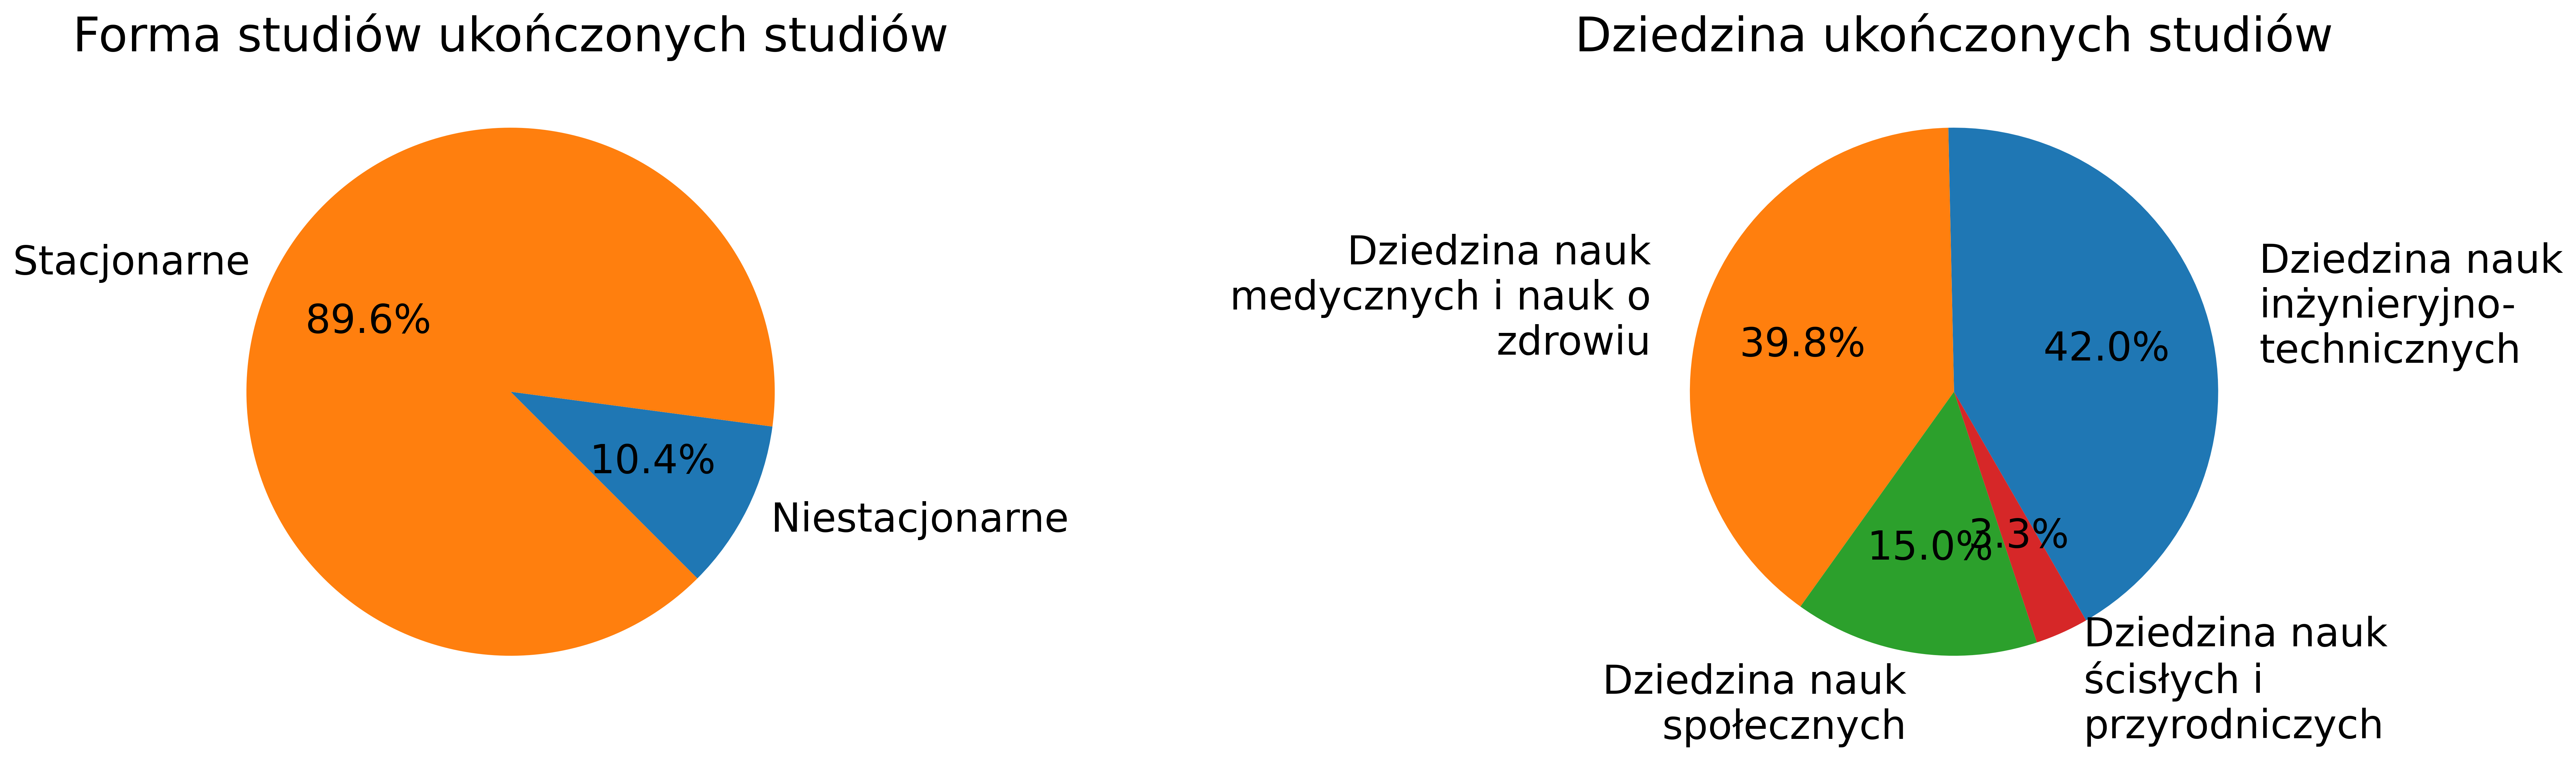

In [68]:
# 100 najlepszych 
best100Forma = data1.sort_values(by="P_ME_ZAR_P5",ascending=False).iloc[:100].reset_index()
# Suma liczby absolwentow na studiach stacjonarnych i niestacjonarnych
best100Forma = best100Forma.groupby(['P_FORMA']).agg({"P_N":"sum"})
best100Forma=best100Forma.reset_index()

best100srDziedz = data1.sort_values(by="P_ME_ZAR_P5",ascending=False).iloc[:100].reset_index()
best100srDziedz = best100srDziedz.groupby(['P_DZIEDZINA']).agg({"P_N":"sum"})
best100srDziedz=best100srDziedz.reset_index()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20),dpi=400)
# piechart1
ax1.set_title("Forma studiów ukończonych studiów")
ax1.pie(best100Forma['P_N'],labels=["Niestacjonarne",'Stacjonarne'],autopct='%1.1f%%',startangle=-45)
# piechart2
from textwrap import wrap
ax2.set_title("Dziedzina ukończonych studiów")
label2 = [ '\n'.join(wrap(l, 20)) for l in best100srDziedz['P_DZIEDZINA'] ]
ax2.pie(best100srDziedz['P_N'],labels=label2,autopct='%1.1f%%',startangle=-60,labeldistance=1.2)
fig.tight_layout(h_pad=5, w_pad=5)
plt.savefig('plots/Udzial100best.png', dpi=400, bbox_inches='tight')
plt.show()